In [13]:
import json
with open("root-children.json") as json_data:
    sentences = json.load(json_data)

In [14]:
from prec_recall import Classification
import numpy as np

neutral = Classification()
connection = Classification()

In [23]:
def avg_diff(threshold):
    for sentence_id in sentences:
        if sentences[sentence_id] is None:
            continue
        best_root = sentences[sentence_id]["relations"][0]
        for relations in sentences[sentence_id]["relations"]:
            if relations["root"] > best_root["root"]:
                best_root = relations
        if "children" in best_root:
            prediction = (best_root["root"] + np.mean(best_root["children"])) / 2 if best_root["children"] != [] else best_root["root"]
        else:
            prediction = best_root["root"]
        if prediction > threshold and abs(sentences[sentence_id]["label"]) == 1:
            connection.TP += 1
        elif prediction > threshold and abs(sentences[sentence_id]["label"]) == 0:
            connection.FP += 1
            neutral.FN += 1
        elif prediction < threshold and abs(sentences[sentence_id]["label"]) == 1:
            connection.FN += 1
            neutral.FP += 1
        else:
            neutral.TP += 1

In [27]:
def threshold_diff(root_threshold, child_threshold):
    for sentence_id in sentences:
        if sentences[sentence_id] is None:
            continue
        best_root = sentences[sentence_id]["relations"][0]
        for relations in sentences[sentence_id]["relations"]:
            if relations["root"] > best_root["root"]:
                best_root = relations
        if "children" in best_root and best_root["children"] != []:
            prediction = 1 if best_root["root"] > root_threshold and max(best_root["children"]) > child_threshold else 0
        else:
            prediction = 1 if best_root["root"] > root_threshold else 0
        if prediction == abs(sentences[sentence_id]["label"]) and abs(sentences[sentence_id]["label"]) == 1:
            connection.TP += 1
        elif prediction != abs(sentences[sentence_id]["label"]) and abs(sentences[sentence_id]["label"]) == 0:
            connection.FP += 1
            neutral.FN += 1
        elif prediction != abs(sentences[sentence_id]["label"]) and abs(sentences[sentence_id]["label"]) == 1:
            connection.FN += 1
            neutral.FP += 1
        else:
            neutral.TP += 1

In [34]:
print("neutral: f1: {0}, prec: {1}, rec: {2}".format(neutral.harmonic(), neutral.precision(), neutral.recall()))
print("connection: f1 {0}, prec: {1}, rec: {2}".format(connection.harmonic(), connection.precision(), connection.recall()))

neutral: f1: 0.4862617650782932, prec: 0.3624642915570769, rec: 0.7384877698579561
connection: f1 0.4779729636999931, prec: 0.7320258003494344, rec: 0.35482823394568436


In [24]:
neutral_f1 = []
neutral_prec = []
neutral_rec = []
connection_f1 = []
connection_prec = []
connection_rec = []
threshold = [x for x in range(30, 100, 5)]
for t in threshold:
    neutral = Classification()
    connection = Classification()
    avg_diff(float(t) / 100.0)
    neutral_f1.append(neutral.harmonic())
    neutral_prec.append(neutral.precision())
    neutral_rec.append(neutral.recall())
    connection_f1.append(connection.harmonic())
    connection_prec.append(connection.precision())
    connection_rec.append(connection.recall())

Text(0,0.5,'Score')

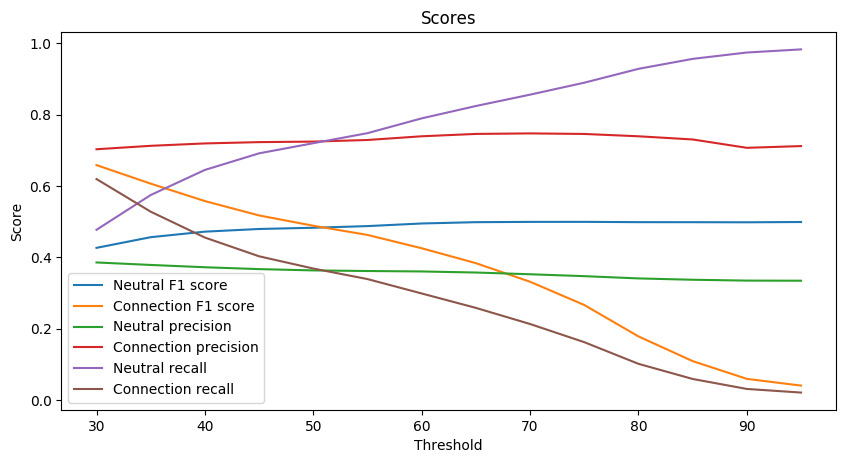

In [25]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(10, 5), dpi=100)
plt.plot(threshold, neutral_f1, label = "Neutral F1 score")
plt.plot(threshold, connection_f1, label = "Connection F1 score")
plt.plot(threshold, neutral_prec, label = "Neutral precision")
plt.plot(threshold, connection_prec, label = "Connection precision")
plt.plot(threshold, neutral_rec, label = "Neutral recall")
plt.plot(threshold, connection_rec, label = "Connection recall")
plt.legend()

plt.title('Scores')
plt.xlabel('Threshold')
plt.ylabel('Score')

In [28]:
neutral_f1 = []
neutral_prec = []
neutral_rec = []
connection_f1 = []
connection_prec = []
connection_rec = []
thresholds = [(x, y) for x in range(30, 100, 5) for y in range(30, 100, 5)]
for t in thresholds:
    neutral = Classification()
    connection = Classification()
    threshold_diff(float(t[0]) / 100.0, float(t[1]) / 100.0)
    neutral_f1.append(neutral.harmonic())
    neutral_prec.append(neutral.precision())
    neutral_rec.append(neutral.recall())
    connection_f1.append(connection.harmonic())
    connection_prec.append(connection.precision())
    connection_rec.append(connection.recall())

Text(0,0.5,'Score')

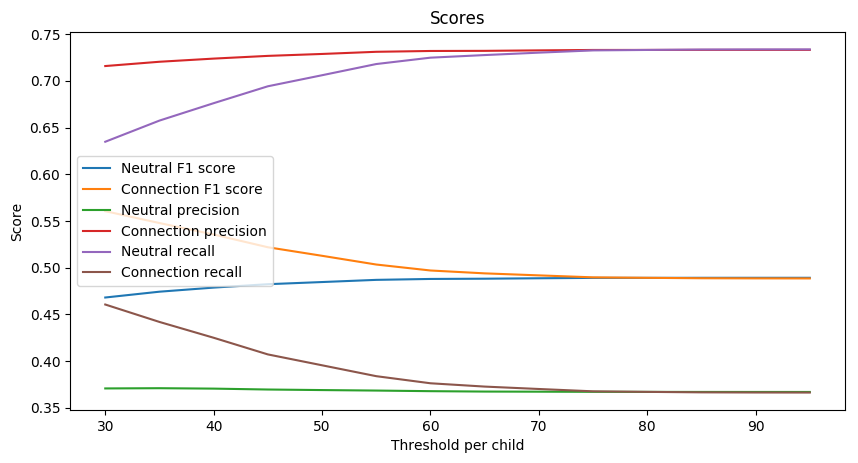

In [30]:
threshold = [x for x in range(30, 100, 5)]
fig = plt.figure(figsize=(10, 5), dpi=100)
plt.plot(threshold, neutral_f1[0:len(threshold)], label = "Neutral F1 score")
plt.plot(threshold, connection_f1[0:len(threshold)], label = "Connection F1 score")
plt.plot(threshold, neutral_prec[0:len(threshold)], label = "Neutral precision")
plt.plot(threshold, connection_prec[0:len(threshold)], label = "Connection precision")
plt.plot(threshold, neutral_rec[0:len(threshold)], label = "Neutral recall")
plt.plot(threshold, connection_rec[0:len(threshold)], label = "Connection recall")
plt.legend()

plt.title('Scores')
plt.xlabel('Threshold per child')
plt.ylabel('Score')

Text(0,0.5,'Score')

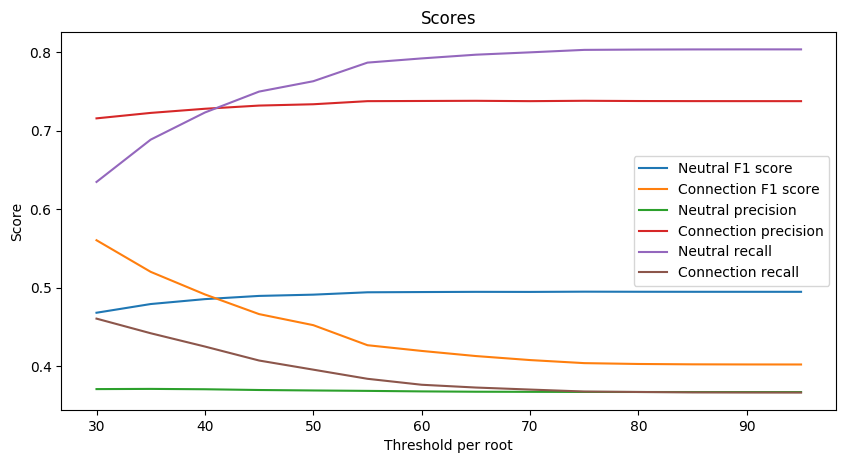

In [31]:
threshold = [x for x in range(30, 100, 5)]
fig = plt.figure(figsize=(10, 5), dpi=100)
plt.plot(threshold, neutral_f1[0::len(threshold)], label = "Neutral F1 score")
plt.plot(threshold, connection_f1[0::len(threshold)], label = "Connection F1 score")
plt.plot(threshold, neutral_prec[0:len(threshold)], label = "Neutral precision")
plt.plot(threshold, connection_prec[0::len(threshold)], label = "Connection precision")
plt.plot(threshold, neutral_rec[0::len(threshold)], label = "Neutral recall")
plt.plot(threshold, connection_rec[0:len(threshold)], label = "Connection recall")
plt.legend()

plt.title('Scores')
plt.xlabel('Threshold per root')
plt.ylabel('Score')